# 4. Stitch outputs together
- Once you have fitted the weak, medium and dense diads, stitch them all together, and apply the Ne correction model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'0.0.88'

In [2]:
# Load in settings, paths, file extensions etc. that you saved in step 1
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

## Load in specra, and combine

In [3]:
import os
df2=pf.merge_fit_files(path=os.getcwd())
df2.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Diad1_Asym50,Diad1_Asym70,Diad1_Yuan2017_sym_factor,Diad1_Remigi2021_BSF,Diad2_Asym50,Diad2_Asym70,Diad2_Yuan2017_sym_factor,Diad2_Remigi2021_BSF,Diad1_PDF_Model,Diad2_PDF_Model
0,187-1-111-reg4-A--Spectrum--012--Spec.Data 1,103.955747,0.041988,1284.095122,0.041181,138.038360,1284.095122,484.387455,1.348290,3.142159,...,1.012376,1.014286,0.033374,0.019535,1.059172,1.118841,0.103145,0.005458,PseudoVoigtModel,PseudoVoigtModel
1,187-1-111-reg4-A--Spectrum--013--Spec.Data 1,103.972925,0.020018,1284.031975,0.018464,132.758709,1284.031975,454.305220,1.334535,2.617592,...,1.142098,1.189796,0.379270,0.020105,1.068762,1.106169,0.121248,0.005787,PseudoVoigtModel,PseudoVoigtModel
2,187-1-111-reg4-A--Spectrum--014--Spec.Data 1,104.024513,0.027741,1284.023547,0.025885,95.275678,1284.023547,324.050694,1.329050,2.175436,...,1.001245,1.068865,0.003310,0.027899,1.003810,1.085795,0.006678,0.008053,PseudoVoigtModel,PseudoVoigtModel
3,187-1-111-reg4-B--Spectrum--016--Spec.Data 1,104.219417,0.010364,1283.578519,0.010012,452.193436,1283.578519,1485.881273,1.254442,5.870318,...,1.133427,1.136316,0.334753,0.005548,1.050980,1.025000,0.088464,0.001741,PseudoVoigtModel,PseudoVoigtModel
4,187-1-111-reg4-B--Spectrum--017--Spec.Data 1,104.210134,0.010121,1283.597691,0.009832,436.507659,1283.597691,1448.303545,1.247749,5.289250,...,1.091034,1.101554,0.227176,0.005717,1.001883,1.016506,0.003316,0.001834,PseudoVoigtModel,PseudoVoigtModel


## First, get the metadata for this day

In [4]:
# Put the common string you can in all your Ne lines here
diad_meta=pf.get_files(path=meta_path,
file_ext=meta_file_ext, exclude_str=['Ne', 'FG', 'Cap','window','Video'],
 sort=True)
diad_meta[0]

'013 187-1-111-reg4-A--Spectrum--012--Information.txt'

## Now get all the important information out of the metadata files

In [5]:
# This will only work for WITEC - for other vendors, you might have to use the file datastamp. See the HORIBA example
meta=pf.stitch_metadata_in_loop_witec(path=meta_path, 
Allfiles=diad_meta, prefix=prefix, str_prefix=str_prefix,
trupower=TruPower)
meta.head()

100%|██████████| 42/42 [00:00<00:00, 954.55it/s]

Done


,filename,date,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,187-1-111-reg4-A--Spectrum--012--Information.txt,"January 17, 2024\n",January,17.0,6.059,60.0,5.0,100.0,"['0h', '5m', '2s']",11:51:35 AM\n,42695.0,1325.004
1,187-1-111-reg4-A--Spectrum--013--Information.txt,"January 17, 2024\n",January,17.0,6.010,60.0,5.0,100.0,"['0h', '5m', '1s']",11:58:15 AM\n,43095.0,1325.004
2,187-1-111-reg4-A--Spectrum--014--Information.txt,"January 17, 2024\n",January,17.0,5.985,60.0,5.0,100.0,"['0h', '5m', '1s']",12:04:10 PM\n,43450.0,1325.004
3,187-1-111-reg4-B--Spectrum--016--Information.txt,"January 17, 2024\n",January,17.0,5.978,60.0,5.0,100.0,"['0h', '5m', '1s']",12:11:50 PM\n,43910.0,1325.004
4,187-1-111-reg4-B--Spectrum--017--Information.txt,"January 17, 2024\n",January,17.0,5.989,60.0,5.0,100.0,"['0h', '5m', '1s']",12:17:01 PM\n,44221.0,1325.004


## Then get a simple file name you can stitch with the spectra

In [6]:
file_m=pf.extracting_filenames_generic(names=meta['filename'],
   file_ext=meta_file_ext)
# Checks they are all unique
file_m[0]

good job, no duplicate file names


'187-1-111-reg4-A--Spectrum--012--Information'

In [7]:
for i in range(len(file_m)):
    file_m[i] = file_m[i].replace("--Information", "")
file_m

array(['187-1-111-reg4-A--Spectrum--012',
       '187-1-111-reg4-A--Spectrum--013',
       '187-1-111-reg4-A--Spectrum--014',
       '187-1-111-reg4-B--Spectrum--016',
       '187-1-111-reg4-B--Spectrum--017',
       '187-1-111-reg4-B--Spectrum--018',
       '187-1-111-reg4-C--Spectrum--021',
       '187-1-111-reg4-C--Spectrum--022',
       '187-1-111-reg4-C--Spectrum--023',
       '187-1-111-reg5-A--Spectrum--032',
       '187-1-111-reg5-A--Spectrum--033',
       '187-1-111-reg5-A--Spectrum--034',
       '187-1-111-reg5-B--Spectrum--036',
       '187-1-111-reg5-C--Spectrum--038',
       '187-1-111-reg5-D--Spectrum--041',
       '187-1-111-reg6-A--Spectrum--047',
       '187-1-111-reg6-B--Spectrum--048',
       '187-1-111-reg7-A--Spectrum--055',
       '187-1-111-reg7-B--Spectrum--057',
       '187-1-111-reg8-A--Spectrum--061',
       '187-1-111-reg8-B--Spectrum--063',
       '187-1-111-reg8-C--Spectrum--065',
       '187-1-112-reg1-A--Spectrum--079',
       '187-1-112-reg2-A--Spectrum

## Now get filename from spectra into same form as metadata

In [8]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(
    names=df2['filename'].reset_index(drop=True),
   file_ext=spectra_file_ext)

# Remove the cosmic rays, as doesnt have it in the metatdata
file_s = np.char.replace(file_s.astype(str), "_CRR_DiadFit", "")
print(file_s[0])

good job, no duplicate file names
187-1-111-reg4-A--Spectrum--012--Spec.Data 1


In [9]:
for i in range(len(file_s)):
    file_s[i] = file_s[i].replace("--Spec.Data 1", "")
file_s

array(['187-1-111-reg4-A--Spectrum--012',
       '187-1-111-reg4-A--Spectrum--013',
       '187-1-111-reg4-A--Spectrum--014',
       '187-1-111-reg4-B--Spectrum--016',
       '187-1-111-reg4-B--Spectrum--017',
       '187-1-111-reg4-B--Spectrum--018',
       '187-1-111-reg4-C--Spectrum--021',
       '187-1-111-reg4-C--Spectrum--022',
       '187-1-111-reg4-C--Spectrum--023',
       '187-1-111-reg5-A--Spectrum--032',
       '187-1-111-reg5-A--Spectrum--033',
       '187-1-111-reg5-A--Spectrum--034',
       '187-1-111-reg5-B--Spectrum--036',
       '187-1-111-reg5-C--Spectrum--038',
       '187-1-111-reg5-D--Spectrum--041',
       '187-1-111-reg6-A--Spectrum--047',
       '187-1-111-reg6-B--Spectrum--048',
       '187-1-111-reg7-A--Spectrum--055',
       '187-1-111-reg7-B--Spectrum--057',
       '187-1-111-reg8-A--Spectrum--061',
       '187-1-111-reg8-B--Spectrum--063',
       '187-1-111-reg8-C--Spectrum--065',
       '187-1-112-reg1-A--Spectrum--079',
       '187-1-112-reg2-A--Spectrum

In [10]:
# Combining them together, if the form above matches, e.g. checking one doesnt have a suffix and the other one does

meta['filename']=file_m
df2['filename']=file_s
df_combo=pd.merge(df2, meta, on='filename').reset_index(drop=True)
df_combo.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,187-1-111-reg4-A--Spectrum--012,103.955747,0.041988,1284.095122,0.041181,138.038360,1284.095122,484.387455,1.348290,3.142159,...,January,17.0,6.059,60.0,5.0,100.0,"['0h', '5m', '2s']",11:51:35 AM\n,42695.0,1325.004
1,187-1-111-reg4-A--Spectrum--013,103.972925,0.020018,1284.031975,0.018464,132.758709,1284.031975,454.305220,1.334535,2.617592,...,January,17.0,6.010,60.0,5.0,100.0,"['0h', '5m', '1s']",11:58:15 AM\n,43095.0,1325.004
2,187-1-111-reg4-A--Spectrum--014,104.024513,0.027741,1284.023547,0.025885,95.275678,1284.023547,324.050694,1.329050,2.175436,...,January,17.0,5.985,60.0,5.0,100.0,"['0h', '5m', '1s']",12:04:10 PM\n,43450.0,1325.004
3,187-1-111-reg4-B--Spectrum--016,104.219417,0.010364,1283.578519,0.010012,452.193436,1283.578519,1485.881273,1.254442,5.870318,...,January,17.0,5.978,60.0,5.0,100.0,"['0h', '5m', '1s']",12:11:50 PM\n,43910.0,1325.004
4,187-1-111-reg4-B--Spectrum--017,104.210134,0.010121,1283.597691,0.009832,436.507659,1283.597691,1448.303545,1.247749,5.289250,...,January,17.0,5.989,60.0,5.0,100.0,"['0h', '5m', '1s']",12:17:01 PM\n,44221.0,1325.004


## If you have secondary phases, now is the time to merge those in

In [11]:
df_combo_sec_phase=pf.merge_in_carb_SO2(
df_combo=df_combo, file1_name='Carb_Peak_fits.xlsx', file2_name='SO2_Peak_fits.xlsx', 
prefix=prefix, str_prefix=str_prefix, file_ext=spectra_file_ext)
#df_combo_sec_phase.to_excel('FI_fitting_w_sec_phases.xlsx', index=False)

Made a df!
good job, no duplicate file names


## If you have SO2, now is the time to calculate the molar proportion of SO2

In [12]:
if 'Peak_Area_SO2' in df_combo_sec_phase:
    SO2_ratio=pf.calculate_CO2_SO2_ratio(peak_area_SO2=df_combo_sec_phase['Peak_Area_SO2'], 
peak_area_diad1=df_combo_sec_phase['Diad1_Voigt_Area'], peak_area_diad2=df_combo_sec_phase['Diad2_Voigt_Area'],
wavelength=532.067, T_K=37+273.15, efficiency_SO2=1, efficiency_CO2=0.5, 
sigma_SO2=4.03, sigma_CO2_v1=0.8, sigma_CO2_v2=1.23)
    df_combo_sec_phase['SO2_mol_ratio']=SO2_ratio['SO2']

## Now we calculate the density using the UC Berkeley Densimeter. 
- If you have your own densimeter, I am happy to add a function for it if you email me (penny_wieser@berkeley.edu)
- This particular function propagates the uncertainty on 1) The neon line correction model 2) the peak fits of the diads themselves 3) The densimeter. 

In [13]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

7.32353596794815e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,sec since midnight,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Model_name,Carb_Diad_Ratio,time,preferred_values,lower_values,upper_values
0,187-1-111-reg4-A--Spectrum--012,0.407236,0.018757,0.018609,0.002349,103.730567,0.041905,0.000781,0.041988,6.059,...,42695.0,NaN,NaN,NaN,NaN,NaN,42695.0,0.997834,0.997826,0.997841
1,187-1-111-reg4-A--Spectrum--013,0.414607,0.009211,0.008906,0.002349,103.747138,0.019989,0.000779,0.020018,6.010,...,43095.0,NaN,NaN,NaN,NaN,NaN,43095.0,0.997828,0.997821,0.997836
2,187-1-111-reg4-A--Spectrum--014,0.437439,0.012687,0.012467,0.002350,103.798117,0.027691,0.000778,0.027741,5.985,...,43450.0,NaN,NaN,NaN,NaN,NaN,43450.0,0.997824,0.997816,0.997831
3,187-1-111-reg4-B--Spectrum--016,0.526551,0.005411,0.004870,0.002359,103.991966,0.010370,0.000777,0.010364,5.978,...,43910.0,NaN,NaN,NaN,NaN,NaN,43910.0,0.997818,0.997810,0.997825
4,187-1-111-reg4-B--Spectrum--017,0.522010,0.005300,0.004746,0.002358,103.982286,0.010129,0.000775,0.010121,5.989,...,44221.0,NaN,NaN,NaN,NaN,NaN,44221.0,0.997814,0.997806,0.997821


In [14]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

7.32353596794815e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,sec since midnight,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Model_name,Carb_Diad_Ratio,time,preferred_values,lower_values,upper_values
0,187-1-111-reg4-A--Spectrum--012,0.407236,0.018757,0.018609,0.002349,103.730567,0.041905,0.000781,0.041988,6.059,...,42695.0,NaN,NaN,NaN,NaN,NaN,42695.0,0.997834,0.997826,0.997841
1,187-1-111-reg4-A--Spectrum--013,0.414607,0.009211,0.008906,0.002349,103.747138,0.019989,0.000779,0.020018,6.010,...,43095.0,NaN,NaN,NaN,NaN,NaN,43095.0,0.997828,0.997821,0.997836
2,187-1-111-reg4-A--Spectrum--014,0.437439,0.012687,0.012467,0.002350,103.798117,0.027691,0.000778,0.027741,5.985,...,43450.0,NaN,NaN,NaN,NaN,NaN,43450.0,0.997824,0.997816,0.997831
3,187-1-111-reg4-B--Spectrum--016,0.526551,0.005411,0.004870,0.002359,103.991966,0.010370,0.000777,0.010364,5.978,...,43910.0,NaN,NaN,NaN,NaN,NaN,43910.0,0.997818,0.997810,0.997825
4,187-1-111-reg4-B--Spectrum--017,0.522010,0.005300,0.004746,0.002358,103.982286,0.010129,0.000775,0.010121,5.989,...,44221.0,NaN,NaN,NaN,NaN,NaN,44221.0,0.997814,0.997806,0.997821


### This cell saves the merged together dataframe with the folder name and the date you fitted it

In [15]:

from datetime import date
today = date.today()
today_str = today.strftime("%Y-%m-%d")
sorted_df = df.sort_values('sec since midnight')
date=meta['date'].iloc[0].replace('\n', '')
name='Raman_session_'+date+'_fitted_'+today_str+'.xlsx'
print(name)
sorted_df.to_excel(name)

Raman_session_January 17, 2024_fitted_2024-04-29.xlsx


## This helps visualize the errors on each spectra 

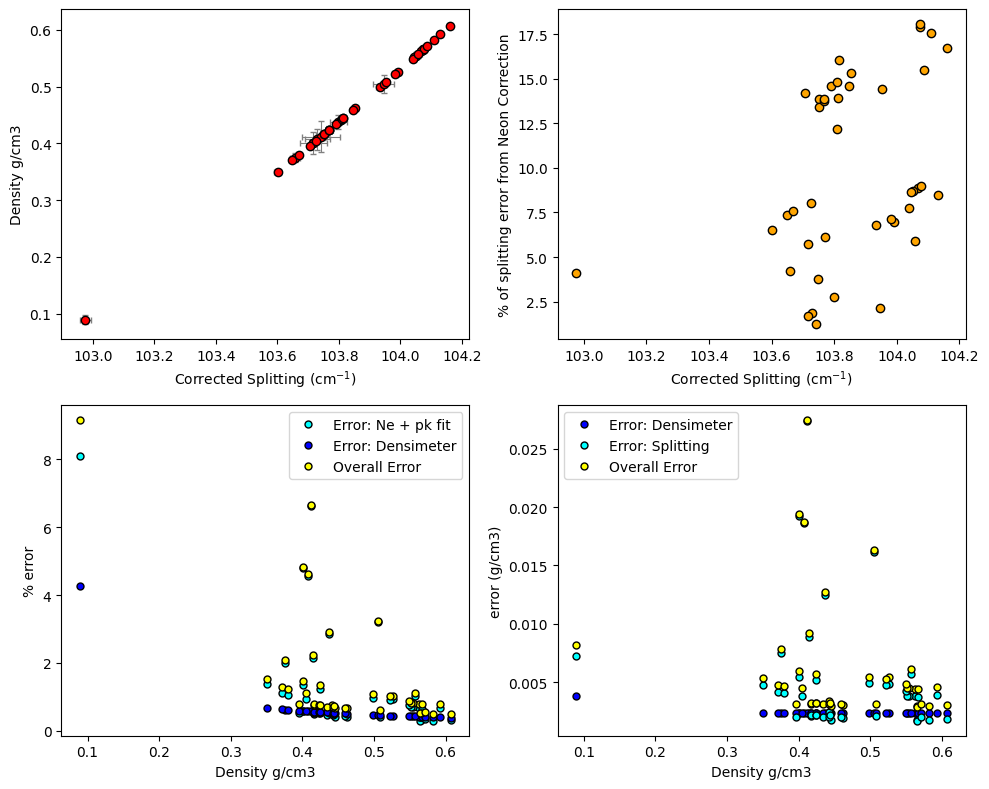

In [16]:
df=sorted_df
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))
df=df.loc[df['Density g/cm3']>0]
ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

ax2.plot(df['Corrected_Splitting'], 
100*df['Corrected_Splitting_σ_Ne']/(df['Corrected_Splitting_σ_Ne']+df['Corrected_Splitting_σ_peak_fit']),
 'ok', mfc='orange')
ax2.set_ylabel('% of splitting error from Neon Correction')
ax2.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from Ne+peakfit)']/df['Density g/cm3'], 
'ok', mfc='cyan', ms=5, label='Error: Ne + pk fit')


ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from densimeter)']/df['Density g/cm3'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')

ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3']/df['Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax3.set_ylabel('% error')
ax3.set_xlabel('Density g/cm3')
ax3.legend()

ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from densimeter)'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from Ne+peakfit)'], 
'ok', mfc='cyan', ms=5, label='Error: Splitting')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax4.set_ylabel('error (g/cm3)')
ax4.set_xlabel('Density g/cm3')
ax4.legend()

fig.tight_layout()

## If you were analysing fluid inclusions, lets calculate their pressures
- This bit isn't valid for melt inclusion vapour bubbles. 

Text(0, 0.5, '# of FI')

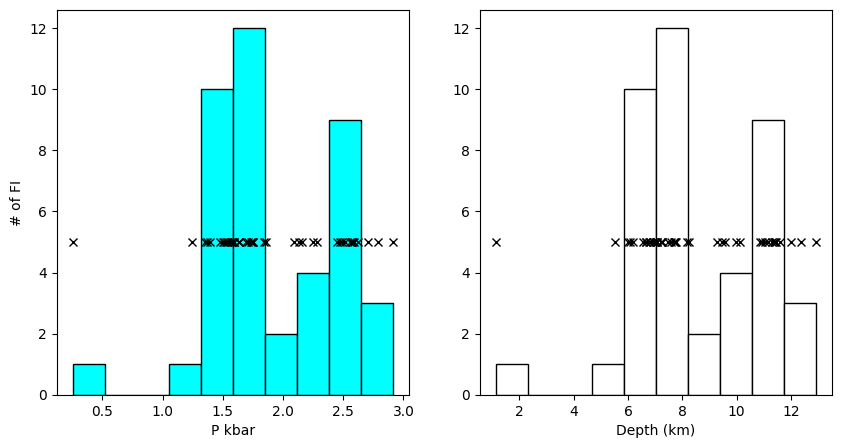

In [17]:
# Calculate pressure with a temperature estimate
Temp_C=1150
Pressure_SW96=pf.calculate_P_for_rho_T(T_K=Temp_C+273.15,
                CO2_dens_gcm3=df['Density g/cm3'],
                 EOS='SW96')
# Calculate depth from a crustal density assumption
Depth=pf.convert_pressure_to_depth(P_kbar=Pressure_SW96['P_kbar'], 
                crust_dens_kgm3=2300)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.hist(Pressure_SW96['P_kbar'], ec='k', fc='cyan', bins=10)
ax1.plot(Pressure_SW96['P_kbar'], Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.plot(Depth, Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.hist(Depth, ec='k', fc='white', bins=10)
ax1.set_xlabel('P kbar')
ax2.set_xlabel('Depth (km)')
ax1.set_ylabel('# of FI')